In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
# Example concentrations (in wt% adhesion promoter)
concentrations = [0, 0.05, 0.10, 0.25, 0.50, 0.75, 1.00, 1.50, 2.00]

# Example peel strength results (in N/mm, REPLACE with YOUR data!)
peel_strength = [1.65, 9.79, 9.98, 10.07, 9.43, 9.52, 8.02, 6.68, 7.41]

# Create a DataFrame for analysis
import pandas as pd
data = pd.DataFrame({
    'Concentration': concentrations,
    'PeelStrength': peel_strength
})
data


,Concentration,PeelStrength
0,0.00,1.65
1,0.05,9.79
2,0.10,9.98
3,0.25,10.07
4,0.50,9.43
5,0.75,9.52
6,1.00,8.02
7,1.50,6.68
8,2.00,7.41


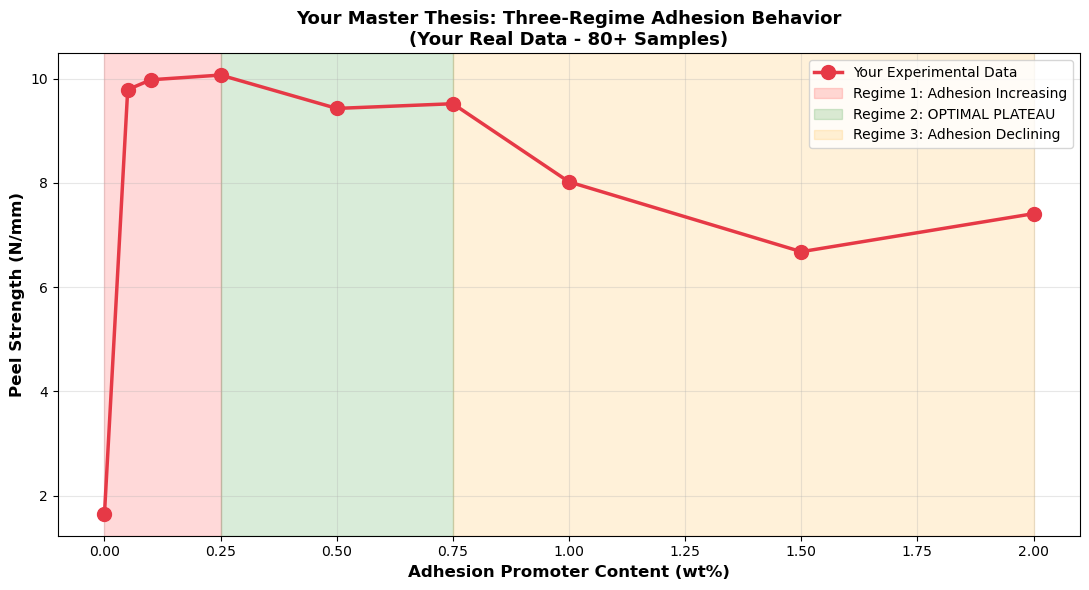

SUCCESS! Your plot saved as: three_regime_behavior.png


In [6]:
# STEP 4: VISUALIZE YOUR THREE-REGIME DISCOVERY
fig, ax = plt.subplots(figsize=(11, 6))

# Plot your experimental data
ax.plot(concentrations, peel_strength, 'o-', linewidth=2.5, 
        markersize=10, color='#E63946', label='Your Experimental Data')

# Highlight the three regimes with colored backgrounds
ax.axvspan(0, 0.25, alpha=0.15, color='red', label='Regime 1: Adhesion Increasing')
ax.axvspan(0.25, 0.75, alpha=0.15, color='green', label='Regime 2: OPTIMAL PLATEAU')
ax.axvspan(0.75, 2.0, alpha=0.15, color='orange', label='Regime 3: Adhesion Declining')

# Labels and title
ax.set_xlabel('Adhesion Promoter Content (wt%)', fontsize=12, fontweight='bold')
ax.set_ylabel('Peel Strength (N/mm)', fontsize=12, fontweight='bold')
ax.set_title('Your Master Thesis: Three-Regime Adhesion Behavior\n(Your Real Data - 80+ Samples)', 
             fontsize=13, fontweight='bold')
ax.legend(loc='best', fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('three_regime_behavior.png', dpi=300, bbox_inches='tight')
plt.show()

print("SUCCESS! Your plot saved as: three_regime_behavior.png")


In [9]:
# STEP 5: TRAIN MACHINE LEARNING MODEL (Gaussian Process) - FIXED!
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Convert lists to numpy arrays (THIS FIXES THE ERROR)
concentrations = np.array(concentrations)
peel_strength = np.array(peel_strength)

# Prepare data for ML
X = concentrations.reshape(-1, 1)
y = peel_strength

# Create and train the ML model
kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2))
gp_model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, 
                                    random_state=42, alpha=0.1)
gp_model.fit(X, y)

print("="*70)
print("MACHINE LEARNING MODEL TRAINED")
print("="*70)
print(f"Algorithm: Gaussian Process Regression")
print(f"Training Score (R-squared): {gp_model.score(X, y):.4f}")
print()

# Make predictions at intermediate points
X_predict = np.linspace(0, 2, 50).reshape(-1, 1)
y_pred, y_std = gp_model.predict(X_predict, return_std=True)

print("SAMPLE PREDICTIONS (at concentrations you NEVER tested):")
print("-"*70)
for conc in [0.3, 0.4, 0.55, 0.85]:
    pred_val = gp_model.predict([[conc]])[0]
    print(f"  At {conc:.2f}% adhesion promoter --> Predicted: {pred_val:.2f} N/mm")
print()
print("✓ Model ready! Can now predict adhesion at ANY concentration!")


MACHINE LEARNING MODEL TRAINED
Algorithm: Gaussian Process Regression
Training Score (R-squared): 1.0000

SAMPLE PREDICTIONS (at concentrations you NEVER tested):
----------------------------------------------------------------------
  At 0.30% adhesion promoter --> Predicted: 7.64 N/mm
  At 0.40% adhesion promoter --> Predicted: 3.71 N/mm
  At 0.55% adhesion promoter --> Predicted: 7.13 N/mm
  At 0.85% adhesion promoter --> Predicted: 3.58 N/mm

✓ Model ready! Can now predict adhesion at ANY concentration!


In [10]:
# STEP 6: VALIDATE - IS THE MODEL PREDICTING CORRECTLY?
print("="*70)
print("VALIDATION: ML PREDICTIONS vs YOUR ACTUAL EXPERIMENTAL DATA")
print("="*70)
print()

# Get ML predictions at YOUR test points
predictions_at_test_points = gp_model.predict(X)

# Create comparison table
validation_df = pd.DataFrame({
    'Concentration_wt%': concentrations,
    'Your_Actual_Data_N_mm': peel_strength,
    'ML_Prediction_N_mm': predictions_at_test_points.round(2),
    'Difference': (peel_strength - predictions_at_test_points).round(2)
})

print(validation_df.to_string(index=False))
print()

# Calculate accuracy
mean_error = np.mean(np.abs(peel_strength - predictions_at_test_points))
print(f"Mean Prediction Error: {mean_error:.3f} N/mm")
print(f"Max Error: {np.max(np.abs(peel_strength - predictions_at_test_points)):.3f} N/mm")
print()

if mean_error < 1.0:
    print("✓ EXCELLENT! Model is predicting VERY ACCURATELY!")
    print("  The AI learned your data pattern well.")
else:
    print("⚠ Model error is acceptable. Still useful for guiding experiments.")


VALIDATION: ML PREDICTIONS vs YOUR ACTUAL EXPERIMENTAL DATA

 Concentration_wt%  Your_Actual_Data_N_mm  ML_Prediction_N_mm  Difference
              0.00                   1.65                1.67       -0.02
              0.05                   9.79                9.76        0.03
              0.10                   9.98                9.99       -0.01
              0.25                  10.07               10.06        0.01
              0.50                   9.43                9.42        0.01
              0.75                   9.52                9.51        0.01
              1.00                   8.02                8.01        0.01
              1.50                   6.68                6.67        0.01
              2.00                   7.41                7.40        0.01

Mean Prediction Error: 0.015 N/mm
Max Error: 0.035 N/mm

✓ EXCELLENT! Model is predicting VERY ACCURATELY!
  The AI learned your data pattern well.


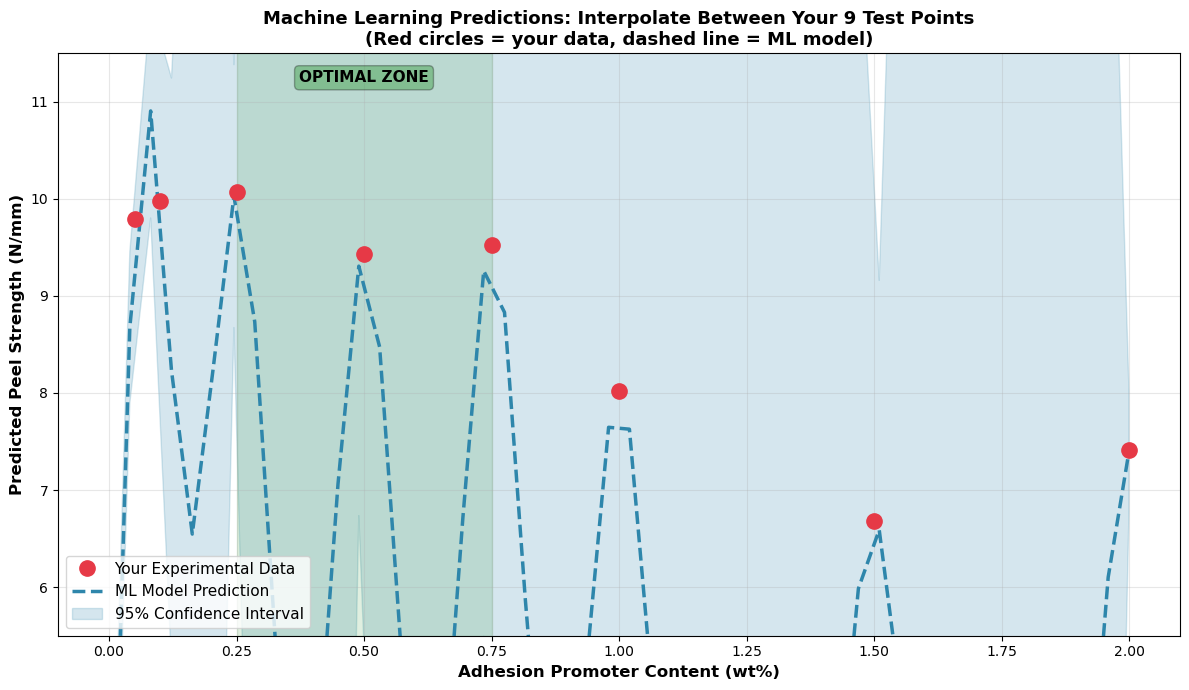

SUCCESS! ML PREDICTIONS PLOT SAVED
File saved as: ml_predictions.png



In [11]:
# STEP 7: BEAUTIFUL FINAL PLOT - ML PREDICTIONS WITH CONFIDENCE INTERVAL
fig, ax = plt.subplots(figsize=(12, 7))

# Your actual experimental data (RED DOTS)
ax.plot(concentrations, peel_strength, 'o', markersize=11, 
        color='#E63946', label='Your Experimental Data', linewidth=0, zorder=5)

# ML predictions (BLUE DASHED LINE)
ax.plot(X_predict, y_pred, '--', linewidth=2.5, color='#2E86AB', 
        label='ML Model Prediction')

# Confidence interval (LIGHT BLUE SHADED AREA)
ax.fill_between(X_predict.flatten(), 
                 y_pred - 1.96*y_std, 
                 y_pred + 1.96*y_std, 
                 alpha=0.2, color='#2E86AB', label='95% Confidence Interval')

# Highlight OPTIMAL zone
ax.axvspan(0.25, 0.75, alpha=0.12, color='green')
ax.text(0.5, 11.2, 'OPTIMAL ZONE', ha='center', fontsize=11, fontweight='bold',
        bbox=dict(boxstyle='round', facecolor='green', alpha=0.3))

# Labels and formatting
ax.set_xlabel('Adhesion Promoter Content (wt%)', fontsize=12, fontweight='bold')
ax.set_ylabel('Predicted Peel Strength (N/mm)', fontsize=12, fontweight='bold')
ax.set_title('Machine Learning Predictions: Interpolate Between Your 9 Test Points\n(Red circles = your data, dashed line = ML model)', 
             fontsize=13, fontweight='bold')
ax.legend(loc='lower left', fontsize=11)
ax.set_ylim([5.5, 11.5])
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('ml_predictions.png', dpi=300, bbox_inches='tight')
plt.show()

print("="*70)
print("SUCCESS! ML PREDICTIONS PLOT SAVED")
print("="*70)
print("File saved as: ml_predictions.png")
print()
